* PCAWG-only 数据所得到的最佳超参数组合
    * 最佳参数: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}  
    * 交叉验证AUC: 0.9791 [PCAWG_data only]

* 扩增后数据所得到的最佳超参数组合
    * 最佳参数: {'C': 1, 'class_weight': None, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}  
    * 交叉验证AUC: 0.9708 [PCAWG_data with extended data]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import os
import joblib
import sys


# 代码配置部分

## 文件和数据集路径指定

In [2]:
# 两种超参数配置
params1 = {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}  # PCAWG_data only
params2 = {'C': 1, 'class_weight': None, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}  # with extended data

# 文件路径
base_dir = "/Volumes/T7-shield/CS-Bachelor-Thesis/CNN_model"
output_path = os.path.join(base_dir, "model_extended_data/comparison/stratified_comparison.png")

# 加载训练和测试数据
print("加载训练和测试特征...")
train_features = np.load(os.path.join(base_dir, "model_extended_data/processed_data/train_combined_features.npy"))
train_labels = np.load(os.path.join(base_dir, "model_extended_data/processed_data/train_labels.npy"))
train_df = pd.read_csv(os.path.join(base_dir, "model_extended_data/train_data.tsv"), sep='\t')

test_features = np.load(os.path.join(base_dir, "model_extended_data/processed_data/test_combined_features.npy"))
test_labels = np.load(os.path.join(base_dir, "model_extended_data/processed_data/test_labels.npy"))
test_df = pd.read_csv(os.path.join(base_dir, "model_extended_data/test_data.tsv"), sep='\t')


加载训练和测试特征...


## 测试集数据分布

In [13]:
# 测试集样本数量设置
TEST_TP_COUNT = 16  # 从TP(真阳性)中抽取的样本数量
TEST_FP_COUNT = 16  # 从FP(假阳性)中抽取的样本数量
TEST_TN_COUNT = 8  # 从TN(真阴性)中抽取的样本数量
TEST_FN_COUNT = 8  # 从FN(假阴性)中抽取的样本数量

random_list = range(2, 5)
# random_list = range(3, 6) N = 15

# 代码执行区，一般无需改动

验证通过: 合并后的标签与tsv文件中的label列一致
数据集分布情况:
真阳性(TP): 2001
假阳性(FP): 166
真阴性(TN): 792
假阴性(FN): 43

测试集组成:
TP: 16, FP: 16, TN: 8, FN: 8
总测试集大小: 48

实验 2:
使用参数集1训练模型...
使用参数集2训练模型...
ChromShatter1: 精确率=0.8571, 召回率=0.7500, F1=0.8000, 准确率=0.8125
ChromShatter2: 精确率=0.7692, 召回率=0.8333, F1=0.8000, 准确率=0.7917
ShatterSeek: 精确率=0.5000, 召回率=0.6667, F1=0.5714, 准确率=0.5000

实验 3:
使用参数集1训练模型...
使用参数集2训练模型...
ChromShatter1: 精确率=0.9048, 召回率=0.7917, F1=0.8444, 准确率=0.8542
ChromShatter2: 精确率=0.8636, 召回率=0.7917, F1=0.8261, 准确率=0.8333
ShatterSeek: 精确率=0.5000, 召回率=0.6667, F1=0.5714, 准确率=0.5000

实验 4:
使用参数集1训练模型...
使用参数集2训练模型...
ChromShatter1: 精确率=1.0000, 召回率=0.8333, F1=0.9091, 准确率=0.9167
ChromShatter2: 精确率=0.9048, 召回率=0.7917, F1=0.8444, 准确率=0.8542
ShatterSeek: 精确率=0.5000, 召回率=0.6667, F1=0.5714, 准确率=0.5000

平均性能指标:
               precision    recall        f1  accuracy
method                                                
ChromShatter1   0.920635  0.791667  0.851178  0.861111
ChromShatter2   0.845876  0.805556  0.82

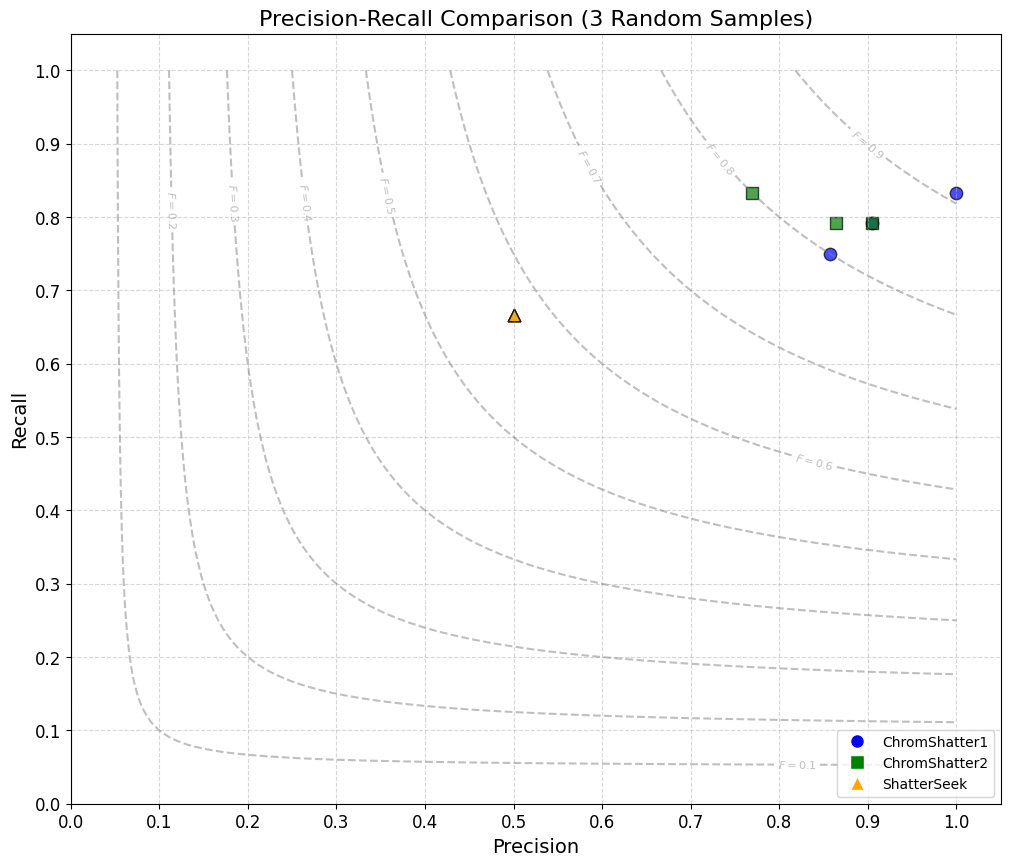


图表已保存到: /Volumes/T7-shield/CS-Bachelor-Thesis/CNN_model/model_extended_data/comparison/stratified_comparison.png

ChromShatter1的详细性能:
  实验 2: 精确率=0.8571, 召回率=0.7500, F1=0.8000, 准确率=0.8125
  实验 3: 精确率=0.9048, 召回率=0.7917, F1=0.8444, 准确率=0.8542
  实验 4: 精确率=1.0000, 召回率=0.8333, F1=0.9091, 准确率=0.9167

ChromShatter2的详细性能:
  实验 2: 精确率=0.7692, 召回率=0.8333, F1=0.8000, 准确率=0.7917
  实验 3: 精确率=0.8636, 召回率=0.7917, F1=0.8261, 准确率=0.8333
  实验 4: 精确率=0.9048, 召回率=0.7917, F1=0.8444, 准确率=0.8542

ShatterSeek的详细性能:
  实验 2: 精确率=0.5000, 召回率=0.6667, F1=0.5714, 准确率=0.5000
  实验 3: 精确率=0.5000, 召回率=0.6667, F1=0.5714, 准确率=0.5000
  实验 4: 精确率=0.5000, 召回率=0.6667, F1=0.5714, 准确率=0.5000


In [14]:
# 合并数据
all_features = np.vstack((train_features, test_features))
all_labels = np.concatenate((train_labels, test_labels))

# 从tsv文件合并ShatterSeek的结果
train_shatterseek = train_df['shatterSeek_label'].astype(int).values
test_shatterseek = test_df['shatterSeek_label'].astype(int).values
all_shatterseek = np.concatenate((train_shatterseek, test_shatterseek))

# 检查合并的标签与tsv文件中的label列是否一致
train_tsv_labels = train_df['label'].astype(int).values
test_tsv_labels = test_df['label'].astype(int).values
all_tsv_labels = np.concatenate((train_tsv_labels, test_tsv_labels))

# 比较合并后的标签与原始标签是否一致
if not np.array_equal(all_labels, all_tsv_labels):
    print("错误: 合并后的标签与tsv文件中的label列不一致!")
    print(f"合并后的标签形状: {all_labels.shape}, tsv文件标签形状: {all_tsv_labels.shape}")
    mismatches = np.sum(all_labels != all_tsv_labels)
    if mismatches > 0:
        print(f"共有 {mismatches} 个不匹配项")
        # 显示前5个不匹配的位置
        mismatch_indices = np.where(all_labels != all_tsv_labels)[0][:5]
        for idx in mismatch_indices:
            print(f"位置 {idx}: 特征文件标签={all_labels[idx]}, tsv文件标签={all_tsv_labels[idx]}")
    raise ValueError("标签不匹配，请检查数据处理流程")
else:
    print("验证通过: 合并后的标签与tsv文件中的label列一致")

# 确保数据长度匹配
if len(all_features) != len(all_labels) or len(all_labels) != len(all_shatterseek):
    raise ValueError(f"特征数量 ({len(all_features)}), 标签数量 ({len(all_labels)}), ShatterSeek结果数量 ({len(all_shatterseek)}) 不匹配")

# 根据真实标签和ShatterSeek预测将数据分为TP、FP、TN、FN四组
tp_indices = np.where((all_labels == 1) & (all_shatterseek == 1))[0]
fp_indices = np.where((all_labels == 0) & (all_shatterseek == 1))[0]
tn_indices = np.where((all_labels == 0) & (all_shatterseek == 0))[0]
fn_indices = np.where((all_labels == 1) & (all_shatterseek == 0))[0]

print(f"数据集分布情况:")
print(f"真阳性(TP): {len(tp_indices)}")
print(f"假阳性(FP): {len(fp_indices)}")
print(f"真阴性(TN): {len(tn_indices)}")
print(f"假阴性(FN): {len(fn_indices)}")

# 设置测试集组成
# 根据实际数据集情况，确保不超过各类别的总数
test_tp = min(TEST_TP_COUNT, len(tp_indices))  # 从TP中抽取的数量
test_fp = min(TEST_FP_COUNT, len(fp_indices))  # 从FP中抽取的数量
test_tn = min(TEST_TN_COUNT, len(tn_indices))  # 从TN中抽取的数量
test_fn = min(TEST_FN_COUNT, len(fn_indices))  # 从FN中抽取的数量

print(f"\n测试集组成:")
print(f"TP: {test_tp}, FP: {test_fp}, TN: {test_tn}, FN: {test_fn}")
print(f"总测试集大小: {test_tp + test_fp + test_tn + test_fn}")

# 准备存储结果的数据结构
results = {
    'experiment': [],
    'method': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': []
}

# 初始化图表
plt.figure(figsize=(12, 10))

# 绘制F1等值线
def plot_f1_contours():
    precision_range = np.linspace(0.01, 1, 100)
    recall_range = np.linspace(0.01, 1, 100)
    P, R = np.meshgrid(precision_range, recall_range)
    F1 = 2 * P * R / (P + R + 1e-10)
    levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    contours = plt.contour(P, R, F1, levels=levels, colors='gray', linestyles='dashed', alpha=0.5)
    plt.clabel(contours, inline=True, fontsize=8, fmt='$F = %.1f$')

plot_f1_contours()

# 颜色和标记设置
colors = ['blue', 'green', 'orange']
markers = ['o', 's', '^']

# 进行5次实验
for exp in random_list:
    print(f"\n实验 {exp}:")
    
    # 设置随机种子，确保可重复性但每次实验不同
    np.random.seed(42 + exp)
    
    # 随机抽取测试集
    test_tp_indices = np.random.choice(tp_indices, test_tp, replace=False)
    test_fp_indices = np.random.choice(fp_indices, test_fp, replace=False)
    test_tn_indices = np.random.choice(tn_indices, test_tn, replace=False)
    test_fn_indices = np.random.choice(fn_indices, test_fn, replace=False)
    
    # 合并所有测试集索引
    test_indices = np.concatenate([test_tp_indices, test_fp_indices, test_tn_indices, test_fn_indices])
    
    # 所有未被选为测试集的索引作为训练集
    all_indices = np.arange(len(all_features))
    train_indices = np.setdiff1d(all_indices, test_indices)
    
    # 划分训练集和测试集
    X_train, X_test = all_features[train_indices], all_features[test_indices]
    y_train, y_test = all_labels[train_indices], all_labels[test_indices]
    shatterseek_test = all_shatterseek[test_indices]
    
    # 训练和测试ChromShatter模型 (参数1)
    print("使用参数集1训练模型...")
    model1 = LogisticRegression(**params1, max_iter=5000, random_state=42)
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    
    precision1 = precision_score(y_test, y_pred1)
    recall1 = recall_score(y_test, y_pred1)
    f1_1 = f1_score(y_test, y_pred1)
    accuracy1 = accuracy_score(y_test, y_pred1)
    
    # 存储结果
    results['experiment'].append(exp)
    results['method'].append('ChromShatter1')
    results['precision'].append(precision1)
    results['recall'].append(recall1)
    results['f1'].append(f1_1)
    results['accuracy'].append(accuracy1)
    
    # 绘制结果点
    plt.scatter(precision1, recall1, marker=markers[0], s=80, 
                color=colors[0], alpha=0.7, edgecolors='black', linewidth=1)
    
    # 训练和测试ChromShatter模型 (参数2)
    print("使用参数集2训练模型...")
    model2 = LogisticRegression(**params2, max_iter=5000, random_state=42)
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict(X_test)
    
    precision2 = precision_score(y_test, y_pred2)
    recall2 = recall_score(y_test, y_pred2)
    f1_2 = f1_score(y_test, y_pred2)
    accuracy2 = accuracy_score(y_test, y_pred2)
    
    # 存储结果
    results['experiment'].append(exp)
    results['method'].append('ChromShatter2')
    results['precision'].append(precision2)
    results['recall'].append(recall2)
    results['f1'].append(f1_2)
    results['accuracy'].append(accuracy2)
    
    # 绘制结果点
    plt.scatter(precision2, recall2, marker=markers[1], s=80, 
                color=colors[1], alpha=0.7, edgecolors='black', linewidth=1)
    
    # 评估ShatterSeek结果
    precision_ss = precision_score(y_test, shatterseek_test)
    recall_ss = recall_score(y_test, shatterseek_test)
    f1_ss = f1_score(y_test, shatterseek_test)
    accuracy_ss = accuracy_score(y_test, shatterseek_test)
    
    # 存储结果
    results['experiment'].append(exp)
    results['method'].append('ShatterSeek')
    results['precision'].append(precision_ss)
    results['recall'].append(recall_ss)
    results['f1'].append(f1_ss)
    results['accuracy'].append(accuracy_ss)
    
    # 绘制结果点
    plt.scatter(precision_ss, recall_ss, marker=markers[2], s=80, 
                color=colors[2], alpha=0.7, edgecolors='black', linewidth=1)
    
    # 打印当前实验结果
    print(f"ChromShatter1: 精确率={precision1:.4f}, 召回率={recall1:.4f}, F1={f1_1:.4f}, 准确率={accuracy1:.4f}")
    print(f"ChromShatter2: 精确率={precision2:.4f}, 召回率={recall2:.4f}, F1={f1_2:.4f}, 准确率={accuracy2:.4f}")
    print(f"ShatterSeek: 精确率={precision_ss:.4f}, 召回率={recall_ss:.4f}, F1={f1_ss:.4f}, 准确率={accuracy_ss:.4f}")

# 转换为DataFrame以便于分析
results_df = pd.DataFrame(results)

# 计算每种方法的平均值
print("\n平均性能指标:")
avg_metrics = results_df.groupby('method')[['precision', 'recall', 'f1', 'accuracy']].mean()
print(avg_metrics)

# 添加图例
custom_legend = [
    plt.Line2D([0], [0], marker=markers[0], color='w', markerfacecolor=colors[0], markersize=10, label='ChromShatter1'),
    plt.Line2D([0], [0], marker=markers[1], color='w', markerfacecolor=colors[1], markersize=10, label='ChromShatter2'),
    plt.Line2D([0], [0], marker=markers[2], color='w', markerfacecolor=colors[2], markersize=10, label='ShatterSeek')
]
plt.legend(handles=custom_legend, loc='lower right')

# 设置图表属性
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.title('Precision-Recall Comparison (3 Random Samples)', fontsize=16)
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# 保存并显示图表
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n图表已保存到: {output_path}")

# 打印每种方法在5次实验中的详细性能
for method in ['ChromShatter1', 'ChromShatter2', 'ShatterSeek']:
    method_results = results_df[results_df['method'] == method]
    print(f"\n{method}的详细性能:")
    for exp in random_list:
        exp_metrics = method_results[method_results['experiment'] == exp]
        print(f"  实验 {exp}: 精确率={exp_metrics['precision'].values[0]:.4f}, "
              f"召回率={exp_metrics['recall'].values[0]:.4f}, "
              f"F1={exp_metrics['f1'].values[0]:.4f}, "
              f"准确率={exp_metrics['accuracy'].values[0]:.4f}")
